In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df.marathon = read.csv('../data//marathon.csv')
df.marathon |> head()

,year,name,country,time,race.time,MF,country.simple
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2,2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
3,2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
4,2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
5,2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
6,2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Use `arrange` to find the best race time.

In [3]:
df.marathon |> arrange(race.time) |> head(1)

,year,name,country,time,race.time,MF,country.simple
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,2011,Geoffrey Mutai,Kenya,2H 3M 2S,2.050556,Men's,Kenya


What are the best race times by country?

In [4]:
df.marathon |> 
    group_by(country) |> summarize(min(race.time))

country,min(race.time)
<chr>,<dbl>
Australia,2.130833
Belgium,2.316111
Canada,2.246111
Colombia,2.312500
Comm. Ind. States,2.395278
England,2.175000
Ethiopia,2.145000
Finland,2.237222
Germany,2.362500


In what year was the difference between the men's and women's winning time smallest? Use this table:

In [5]:
df = df.marathon |>
    select(year, MF, race.time) |>
    tidyr::spread(MF, race.time) |>
    drop_na() |>
    rename(men = `Men's`, women = `Women's`)

df |> head()

,year,men,women
,<int>,<dbl>,<dbl>
1,1972,2.260833,3.173889
2,1973,2.267500,3.099722
3,1974,2.227500,2.786389
4,1975,2.165278,2.706667
5,1976,2.338611,2.786111
6,1977,2.246111,2.809167


In [7]:
df |> mutate(time.dif = abs(women-men)) |> arrange(time.dif) |> head(1)

,year,men,women,time.dif
,<int>,<dbl>,<dbl>,<dbl>
1,2014,2.143611,2.333056,0.1894444


Plot the difference between men's and women's race times by year.

In [16]:
options(repr.plot.res = 250, repr.plot.width = 5, repr.plot.height = 4)

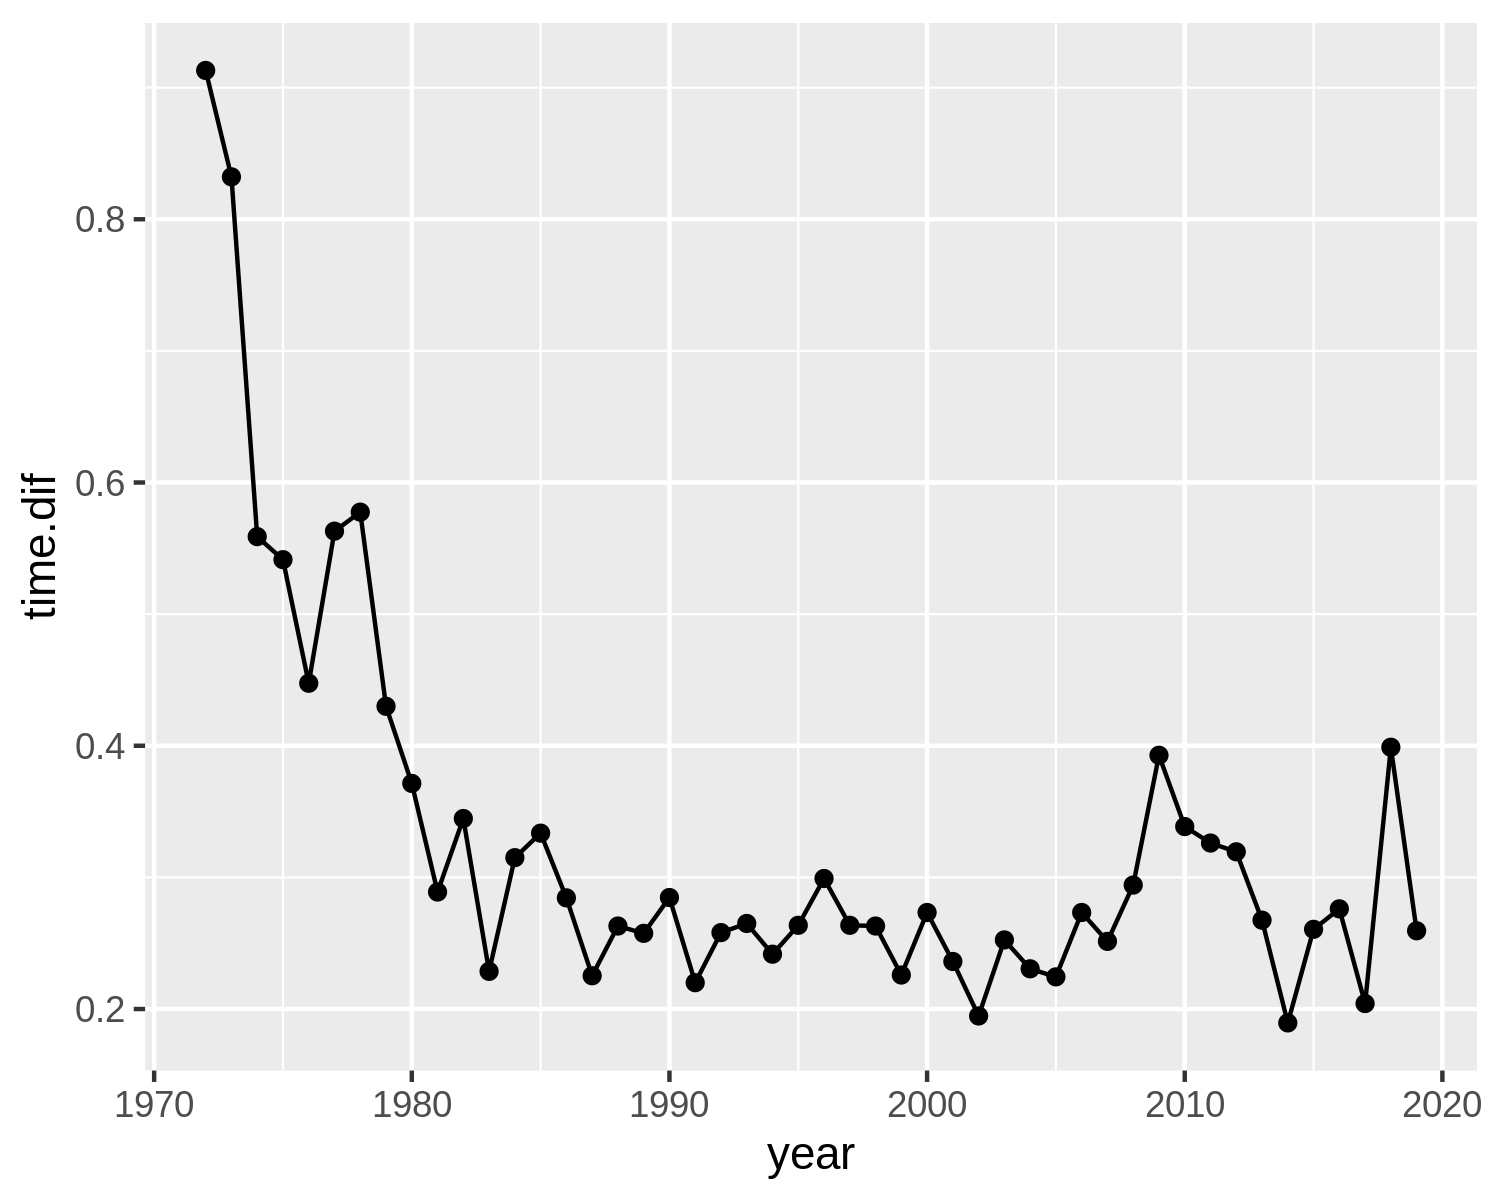

In [10]:
df_diff = df |> mutate(time.dif = abs(women-men))
p = ggplot(df_diff, aes(x = year, y = time.dif)) + geom_point() + geom_line()
p